In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
import skbio
from matplotlib.backends.backend_pdf import PdfPages 
import scipy as sp
from dit.divergences import jensen_shannon_divergence
import itertools
from dit import Distribution
from dit import ScalarDistribution
from scipy.spatial.distance import squareform


from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Div
from bokeh.io import output_notebook

In [237]:
seq_var = pd.read_csv("all_filtered_otu_table_counts.csv", index_col=0)
seq_var = seq_var.replace(0,np.nan)
seq_var_abundance = pd.read_csv("all_filtered_otu_table.csv", index_col=0)
metadata = pd.read_csv("sample_metadata.csv", index_col=0)
taxonomy = pd.read_csv("taxanomic_assignment.csv", index_col=0)

### Distance by seq vars, JSD

In [232]:
def jsd_overlap_one_pair(table, data1, data2):
    both = pd.concat([table[data1], table[data2]], axis=1).dropna()
    for col in both.columns:
            #convert counts to relative abundances
        both[col] = (both[col]/both[col].sum()).astype(float)
    #get probability distributions for each sample
    try:
        dist1 = ScalarDistribution(both[data1].to_dict())

        dist2 = ScalarDistribution(both[data2].to_dict())

        #calculate JSD
        jsd = jensen_shannon_divergence([dist1, dist2], None)
    except:
        print("error", data1, data2)
        jsd = 0.5
    return jsd
       

In [245]:
def jsd_overlap(table, sample_combos):
    matrix_dict={}
    for pair in sample_combos:
        #discard unshared features         
        both = pd.concat([table[pair[0]], table[pair[1]]], axis=1).dropna()
        for col in both.columns:
            #convert counts to relative abundances
            both[col] = (both[col]/both[col].sum()).astype(float)
        try:
            #get probability distributions for each sample
            
            dist1 = ScalarDistribution(both[pair[0]].to_dict())
            
            dist2 = ScalarDistribution(both[pair[1]].to_dict())
            
            #calculate JSD
            jsd = jensen_shannon_divergence([dist1, dist2], None)
  
            matrix_dict[pair] = jsd
        except:
            print("error", pair)
            matrix_dict[pair] = 0
            continue
    return matrix_dict

In [188]:
def jsd_without_overlap(table, sample_combos):
    matrix_dict={}
    for pair in sample_combos:
        
        both = pd.concat([table[pair[0]], table[pair[1]]], axis=1)
        for col in both.columns:
            #convert counts to relative abundances
            both[col] = (both[col]/both[col].sum()).astype(float)
        try:
            #get probability distributions for each sample

            dist1 = ScalarDistribution(both[pair[0]].to_dict())

            dist2 = ScalarDistribution(both[pair[1]].to_dict())

            #calculate JSD
            jsd = jensen_shannon_divergence([dist1, dist2], None)

            matrix_dict[pair] = jsd
        except:
            print("error", pair)
            matrix_dict[pair] = 0
            continue
    return matrix_dict

In [58]:
def compute_pcoa(jsd_dict, table, sample_list):
    dist_list = [dist[1] for dist in sorted(jsd_dict.items())]
    squared = squareform(dist_list)
    dist_mat = pd.DataFrame(squared, index=list(sample_list), columns=list(sample_list))
    pcoa_results = skbio.stats.ordination.pcoa(np.sqrt(dist_mat))
    return pcoa_results

In [89]:
def pcoa_add_index(pcoa_results, sample_list):
    pcoa_df = pcoa_results.samples.reset_index()
    pcoa_df = pcoa_df.set_index(sample_list)
    pcoa_df = pcoa_df.loc[:,"PC1":"PC2"]
    return pcoa_df

In [66]:
def plot_pcoa(pcoa_results, category, sample_list, metadata):
    pcoa_df = pcoa_results.samples.reset_index()
    pcoa_df = pcoa_df.set_index(sample_list)
    pcoa_df = pcoa_df.loc[:,"PC1":"PC2"]
    df = pd.concat([pcoa_df,metadata], axis=1)
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

    sns.lmplot('PC1', 'PC2',
               data=df,hue=category,
               fit_reg=False,
               scatter_kws={"marker": "D",
                            "s": 50})
    plt.xlabel("PC1 {}%".format(pcoa_results.proportion_explained[0]*100))
    plt.ylabel("PC2 {}%".format(pcoa_results.proportion_explained[1]*100))
    plt.show()

In [241]:
samples = seq_var_abundance.columns
sample_combos = list(itertools.combinations(samples, 2))
donor_seq_var_abundance = seq_var_abundance[metadata.index[metadata["donor_v_patient"]=="donor"]]
donor_seq_var = seq_var[metadata.index[metadata["donor_v_patient"]=="donor"]]
donor_samples = donor_seq_var_abundance.columns

donor_sample_combos = list(itertools.combinations(donor_samples, 2))

In [244]:
jsd_dict_all = jsd_overlap(seq_var, sample_combos)

error ('ndc407', 'ndc417')
Empty DataFrame
Columns: [ndc407, ndc417]
Index: []
error ('ndc407', 'ndc432')
Empty DataFrame
Columns: [ndc407, ndc432]
Index: []
error ('ndc407', 'ndc459')
Empty DataFrame
Columns: [ndc407, ndc459]
Index: []
error ('ndc411', 'ndc429')
Empty DataFrame
Columns: [ndc411, ndc429]
Index: []
error ('ndc412', 'ndc417')
Empty DataFrame
Columns: [ndc412, ndc417]
Index: []
error ('ndc412', 'ndc432')
Empty DataFrame
Columns: [ndc412, ndc432]
Index: []
error ('ndc412', 'ndc459')
Empty DataFrame
Columns: [ndc412, ndc459]
Index: []
error ('ndc421', 'ndc432')
Empty DataFrame
Columns: [ndc421, ndc432]
Index: []
error ('ndc422', 'ndc432')
Empty DataFrame
Columns: [ndc422, ndc432]
Index: []
error ('ndc429', 'ndc472')
Empty DataFrame
Columns: [ndc429, ndc472]
Index: []
error ('ndc431', 'ndc432')
Empty DataFrame
Columns: [ndc431, ndc432]
Index: []
error ('ndc432', 'ndc435')
Empty DataFrame
Columns: [ndc432, ndc435]
Index: []
error ('ndc432', 'ndc436')
Empty DataFrame
Columns: 

In [246]:
jsd_dict_just_donors = jsd_overlap(donor_seq_var, donor_sample_combos)

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.48880336178683 and the largest is 3.7197852557553768.
  RuntimeWarning


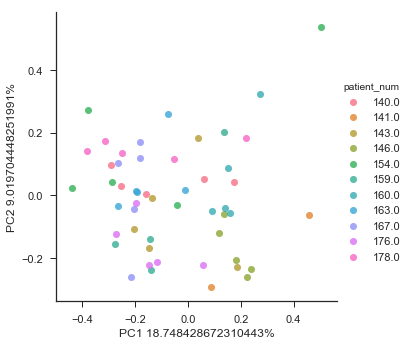

In [247]:
plot_pcoa(compute_pcoa(jsd_dict_all, seq_var_abundance, samples), "patient_num", samples, metadata, )

In [161]:
pcoa_all = compute_pcoa(jsd_dict_all, seq_var, samples)
pcoa_df = pcoa_all.samples.reset_index()
pcoa_df = pcoa_df.set_index(samples)
pcoa_df = pcoa_df.loc[:,"PC1":"PC2"]
df = pd.concat([pcoa_df,metadata], axis=1)

output_notebook()

hover = HoverTool(tooltips=[
    ("Treatment", "@anaerobic_fmt"), ("Processing", "@anaerobic_proc"),("Timepoint", "@timepoint"), ("Donor", "@donor_num"), ("Patient", "@patient_num")])

p = figure(tools=[hover], x_axis_label="PC1 {}%".format(pcoa_results.proportion_explained[0]*100), y_axis_label="PC2 {}%".format(pcoa_results.proportion_explained[1]*100))
t1 = p.circle(x='PC1', y='PC2', color='#084594',name="ndc414", source=df[df["direct_donor_fmt_id"]=="ndc414"])
t1 = p.circle(x='PC1', y='PC2', color='red',name="ndc413", source=df[df["direct_donor_fmt_id"]=="ndc413"])
p.legend.location="top_left"
show(p)

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.4889301046239272 and the largest is 3.7202586496887333.
  RuntimeWarning


Loading BokehJS ...

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.015941039750899458 and the largest is 0.5213699379575572.
  RuntimeWarning


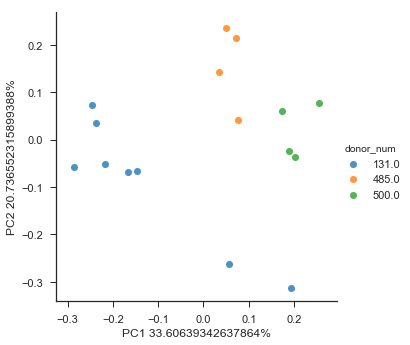

In [243]:
plot_pcoa(compute_pcoa(jsd_dict_just_donors, donor_seq_var_abundance, donor_samples), "donor_num", donor_samples, metadata)

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.45871780469035617 and the largest is 0.648703516567564.
  RuntimeWarning


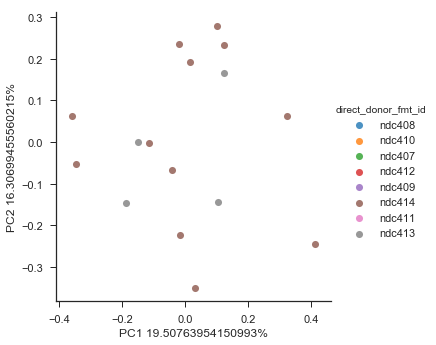

In [163]:
donor131_aerobic414_seq_var = seq_var[metadata.index[(metadata["anaerobic_fmt"]=="Aerobic")&(metadata["timepoint"]!="Pre-FMT")&(metadata["donor_fmt_num"]==131)]]
donor131_aerobic414_samples = donor131_aerobic414_seq_var.columns
donor131_aerobic414_sample_combos = list(itertools.combinations(donor131_aerobic414_samples, 2))

jsd_dict_donor131_aerobic414 = jsd_overlap(donor131_aerobic414_seq_var, donor131_aerobic414_sample_combos)
plot_pcoa(compute_pcoa(jsd_dict_donor131_aerobic414, donor131_aerobic414_seq_var, donor131_aerobic414_samples), "direct_donor_fmt_id", donor131_aerobic414_samples, metadata, )

### Correlations

In [198]:
pcoa_just_donors = compute_pcoa(jsd_dict_just_donors, donor_seq_var, donor_samples)

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.015941039750899475 and the largest is 0.5213699379575572.
  RuntimeWarning


In [199]:
pcoa_just_donors_df = pcoa_add_index(pcoa_just_donors, donor_samples) 

In [195]:
donor_pcoa_abundance_corrs = pd.DataFrame(columns=["seq_var", "PC", "genus", "family","coeff", "pval"])
for variant in donor_seq_var_abundance.index:
    abundance = donor_seq_var_abundance.loc[variant]
    genus = taxonomy.loc[variant, "Genus"]
    family = taxonomy.loc[variant, "Family"]
    #make sure pcoa_just_donors_df is the right one
    for pc in pcoa_just_donors_df.columns:
        pc_coord = pcoa_just_donors_df[pc]
        coeff, pval = sp.stats.spearmanr(abundance, pc_coord, nan_policy="omit")
        donor_pcoa_abundance_corrs = donor_pcoa_abundance_corrs.append({"seq_var":variant, "PC":pc, "genus":genus, "family":family, "coeff":coeff, "pval":pval}, ignore_index=True)
donor_pcoa_abundance_corrs.to_csv("donor_pcoa_abundance_corrs/jsd_all_seq_vars.csv") 

In [204]:
donor_pcoa_abundance_corrs = pd.DataFrame(columns=["seq_var","PC","genus","family","coeff","pval"])
for variant in donor_seq_var_abundance.index:
    abundance = donor_seq_var_abundance.loc[variant]
    genus = taxonomy.loc[variant, "Genus"]
    family = taxonomy.loc[variant, "Family"]
    for pc in pcoa_just_donors_df.columns:
        pc_coord = pcoa_just_donors_df[pc]
        coeff, pval = sp.stats.spearmanr(abundance, pc_coord)
        donor_pcoa_abundance_corrs = donor_pcoa_abundance_corrs.append({"seq_var":variant, "PC":pc, "genus":genus, "family":family, "coeff":coeff, "pval":pval}, ignore_index=True)
donor_pcoa_abundance_corrs.to_csv("donor_pcoa_abundance_corrs/jsd_only_overlapping_seq_vars.csv") 

In [207]:
donor_pcoa_abundance_corrs.sort_values(by="pval")

,seq_var,PC,genus,family,coeff,pval
300,TACGTAGGGAGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTG...,PC1,Ruminiclostridium_5,Ruminococcaceae,-0.931646,1.558391e-07
126,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAG...,PC1,Streptococcus,Streptococcaceae,-0.926258,2.612253e-07
648,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,PC1,Blautia,Lachnospiraceae,-0.910506,9.704629e-07
714,TACGTAGGTCCCGAGCGTTATCCGGATTTATTGGGCGTAAAGCGAG...,PC1,Streptococcus,Streptococcaceae,-0.879651,7.092699e-06
26,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,PC1,Roseburia,Lachnospiraceae,-0.876471,8.439119e-06
111,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG...,PC2,Subdoligranulum,Ruminococcaceae,0.876471,8.439119e-06
186,TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG...,PC1,NaN,Ruminococcaceae,-0.868593,1.272833e-05
18,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG...,PC1,Subdoligranulum,Ruminococcaceae,-0.861765,1.780518e-05
121,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG...,PC2,Faecalibacterium,Ruminococcaceae,-0.855882,2.344916e-05
778,TACGTAGGGAGCGAGCGTTATCCGGATTTATTGGGTGTAAAGGGTG...,PC1,Ruminococcaceae_UCG-014,Ruminococcaceae,-0.849147,3.168313e-05


### Distance by sequence variants

In [82]:
bc_dist = pairwise_distances(seq_var_abundance.T, metric = "braycurtis")
bc_dist = pd.DataFrame(bc_dist, index=seq_var_abundance.columns, columns=seq_var_abundance.columns)

In [83]:
pcoa_results = skbio.stats.ordination.pcoa(bc_dist)
pcoa_df = pcoa_results.samples
pcoa_df = pcoa_df.set_index(seq_var_abundance.columns)
pcoa_df = pcoa_df.loc[:,"PC1":"PC2"]

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.07466694653186352 and the largest is 4.499941379968953.
  RuntimeWarning


In [84]:
df = pd.concat([pcoa_df,metadata], axis=1)

In [85]:
df[(df["donor_v_patient"]=="donor") & (df["pma"]=="direct")].sort_values(by="PC2")

,PC1,PC2,pma,speedvac,donor_v_patient,anaerobic_proc,patient_sex,patient_age,donor_fmt_num,anaerobic_fmt,timepoint,donor_num,person_id,patient_num,direct_donor_fmt_id,pma_donor_fmt_id,fmt_sample
ndc411,-0.351288,-0.175101,direct,no,donor,aerobic,NaN,NaN,NaN,NaN,NaN,485.0,485.0,NaN,NaN,NaN,NaN
ndc412,-0.326464,-0.122605,direct,yes,donor,aerobic,NaN,NaN,NaN,NaN,NaN,500.0,500.0,NaN,NaN,NaN,NaN
ndc410,-0.303048,-0.115650,direct,no,donor,anaerobic,NaN,NaN,NaN,NaN,NaN,485.0,485.0,NaN,NaN,NaN,NaN
ndc407,-0.277930,-0.040695,direct,no,donor,anaerobic,NaN,NaN,NaN,NaN,NaN,500.0,500.0,NaN,NaN,NaN,NaN
ndc408,-0.361142,0.149008,direct,yes,donor,anaerobic,NaN,NaN,NaN,NaN,NaN,131.0,131.0,NaN,NaN,NaN,NaN
ndc414,-0.377545,0.149829,direct,no,donor,aerobic,NaN,NaN,NaN,NaN,NaN,131.0,131.0,NaN,NaN,NaN,NaN
ndc413,-0.376753,0.154926,direct,no,donor,aerobic,NaN,NaN,NaN,NaN,NaN,131.0,131.0,NaN,NaN,NaN,NaN
ndc409,-0.329690,0.159250,direct,no,donor,anaerobic,NaN,NaN,NaN,NaN,NaN,131.0,131.0,NaN,NaN,NaN,NaN


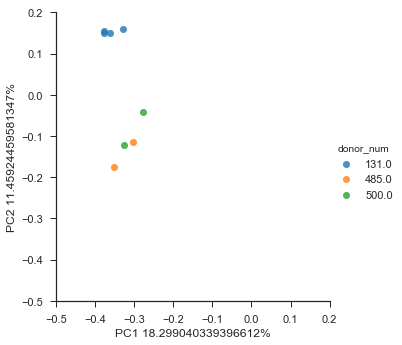

In [90]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('PC1', 'PC2',
           data=df[(df["donor_v_patient"]=="donor") & (df["pma"]=="direct")].sort_values(by="PC2"),hue="donor_num",
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 50})
plt.xlabel("PC1 {}%".format(pcoa_results.proportion_explained[0]*100))
plt.ylabel("PC2 {}%".format(pcoa_results.proportion_explained[1]*100))
plt.xlim([-0.5, 0.2])
plt.ylim([-0.5, 0.2])
plt.show()

### Paired

In [212]:
def unique(seq, idfun=None): 
   # order preserving
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        if item != np.nan:
            marker = idfun(item)
            if marker in seen: continue
            seen[marker] = 1
            result.append(item)
    return result

In [213]:
metadata = pd.read_csv("sample_metadata.csv", index_col=0)

In [214]:
patients = unique(metadata["patient_num"].values)[:11]

### JSD

In [233]:
jsd_summary_df = pd.DataFrame(columns=["donor", "timepoint", "aerobic", "direct/pma", "jsd"])
donor_dict = {131:"Donor 1", 485:"Donor 2", 500:"Donor 3"}

with PdfPages("jsd_timeseries.pdf") as pp:
    for patient in patients:
        jsd_df = pd.DataFrame(columns=["timepoint", "direct/pma", "jsd"])
        for i, timepoint in enumerate(["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"]):  
            try:
                sample_id = metadata.index[(metadata["person_id"] == patient) & (metadata["timepoint"] == timepoint)][0]                
                donor = metadata.loc[sample_id, "donor_fmt_num"]              
                direct_id = metadata.loc[sample_id,"direct_donor_fmt_id"]       
                pma_id = metadata.loc[sample_id,"pma_donor_fmt_id"]
                
                aerobic = metadata.loc[sample_id, "anaerobic_fmt"]
                
                direct_jsd = jsd_overlap_one_pair(seq_var, sample_id, direct_id)
                pma_jsd = jsd_overlap_one_pair(seq_var, sample_id, pma_id)                
                donor = donor_dict[int(metadata.loc[sample_id, "donor_fmt_num"])]
               
                jsd_df = jsd_df.append({"timepoint":timepoint, "direct/pma":"direct", "jsd":direct_jsd}, ignore_index=True)
                jsd_df = jsd_df.append({"timepoint":timepoint, "direct/pma":"pma", "jsd":pma_jsd}, ignore_index=True)
                jsd_summary_df = jsd_summary_df.append({"donor":donor, "timepoint":timepoint, "aerobic":aerobic,"direct/pma":"pma", "jsd":pma_jsd}, ignore_index=True)
                jsd_summary_df = jsd_summary_df.append({"donor":donor, "timepoint":timepoint, "aerobic":aerobic,"direct/pma":"direct", "jsd":direct_jsd}, ignore_index=True)
            except Exception as e:
                print(e)

        ax = sns.barplot(x="timepoint", y="jsd", hue="direct/pma",data = jsd_df)
        ax.set_title("Patient: {} {} {}".format(int(patient), donor, aerobic))
        ax.set_ylabel("jsd distance from donor")
        pp.savefig()
        plt.close()
        

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
error ndc417 ndc407
index 0 is out of bounds for axis 0 with size 0


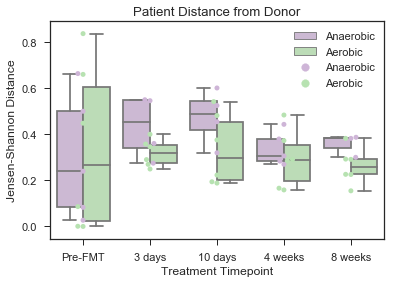

In [234]:
ax = sns.boxplot(x="timepoint", y="jsd", hue="aerobic", palette="PRGn",data=jsd_summary_df[jsd_summary_df["direct/pma"]=="direct"])
sns.swarmplot(x="timepoint", y="jsd", hue="aerobic", palette="PRGn",data=jsd_summary_df[jsd_summary_df["direct/pma"]=="direct"])
plt.xticks(plt.xticks()[0], ["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"])
ax.set_ylabel("Jensen-Shannon Distance")
ax.set_xlabel("Treatment Timepoint")
ax.set_title("Patient Distance from Donor")
leg = ax.axes.get_legend()
leg.set_title("")
plt.show()

In [16]:
jaccard_summary_direct_df = jaccard_summary_df[jaccard_summary_df["direct/pma"]=="direct"]

In [44]:
jaccard8weeksanaerobic = np.array(jaccard_summary_direct_df[(jaccard_summary_direct_df["aerobic"]=="Anaerobic") & (jaccard_summary_direct_df["timepoint"]=="8 weeks") ].jaccard)
jaccard8weeksaerobic = np.array(jaccard_summary_direct_df[(jaccard_summary_direct_df["aerobic"]=="Aerobic") & (jaccard_summary_direct_df["timepoint"]=="8 weeks") ].jaccard)

In [46]:
jaccard4weeksanaerobic = np.array(jaccard_summary_direct_df[(jaccard_summary_direct_df["aerobic"]=="Anaerobic") & (jaccard_summary_direct_df["timepoint"]=="4 weeks") ].jaccard)

In [47]:
sp.stats.mannwhitneyu(jaccard8weeksanaerobic, jaccard4weeksanaerobic)

MannwhitneyuResult(statistic=1.0, pvalue=0.036819135060151331)

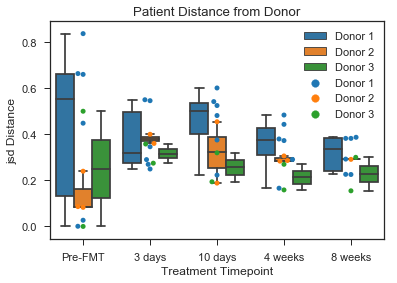

In [235]:
ax = sns.boxplot(x="timepoint", y="jsd", hue="donor", data=jsd_summary_df[jsd_summary_df["direct/pma"]=="direct"])
sns.swarmplot(x="timepoint", y="jsd", hue="donor", data=jsd_summary_df[jsd_summary_df["direct/pma"]=="direct"])
plt.xticks(plt.xticks()[0], ["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"])
ax.set_ylabel("jsd Distance")
ax.set_xlabel("Treatment Timepoint")
ax.set_title("Patient Distance from Donor")
leg = ax.axes.get_legend()
leg.set_title("")
plt.show()

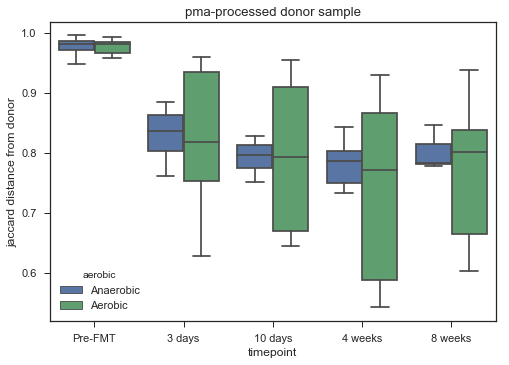

In [20]:
ax = sns.boxplot(x="timepoint", y="jaccard", hue="aerobic", data=jaccard_summary_df[jaccard_summary_df["direct/pma"]=="pma"])
plt.xticks(plt.xticks()[0], ["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"])
ax.set_ylabel("jaccard distance from donor")
ax.set_title("pma-processed donor sample")
plt.show()

In [70]:
braycurtis_summary_df = pd.DataFrame(columns=["timepoint", "aerobic", "direct/pma", "braycurtis"])
with PdfPages("braycurtis_timeseries.pdf") as pp:
    for patient in patients:
        braycurtis_df = pd.DataFrame(columns=["timepoint", "direct/pma", "braycurtis"])
        for i, timepoint in enumerate(["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"]):  
            try:
                sample_id = metadata.index[(metadata["person_id"] == patient) & (metadata["timepoint"] == timepoint)][0]                
                donor = metadata.loc[sample_id, "donor_fmt_num"]              
                direct_id = metadata.loc[sample_id,"direct_donor_fmt_id"]
                
                pma_id = metadata.loc[sample_id,"pma_donor_fmt_id"]
                aerobic = metadata.loc[sample_id, "anaerobic_fmt"]
                direct_braycurtis = pairwise_distances(pd.concat([seq_var_abundance[sample_id], seq_var_abundance[direct_id]], axis=1).T,metric="braycurtis")[0][1]
                pma_braycurtis = pairwise_distances(pd.concat([seq_var_abundance[sample_id] , seq_var_abundance[pma_id]], axis=1).T, metric="braycurtis")[0][1]
                
                braycurtis_df = braycurtis_df.append({"timepoint":timepoint, "direct/pma":"direct", "braycurtis":direct_braycurtis}, ignore_index=True)
                braycurtis_df = braycurtis_df.append({"timepoint":timepoint, "direct/pma":"pma", "braycurtis":pma_braycurtis}, ignore_index=True)
                braycurtis_summary_df = braycurtis_summary_df.append({"timepoint":timepoint, "aerobic":aerobic,"direct/pma":"pma", "braycurtis":pma_braycurtis}, ignore_index=True)
                braycurtis_summary_df = braycurtis_summary_df.append({"timepoint":timepoint, "aerobic":aerobic,"direct/pma":"direct", "braycurtis":direct_braycurtis}, ignore_index=True)
            except Exception as e:
                print(e)

        ax = sns.barplot(x="timepoint", y="braycurtis", hue="direct/pma",data = braycurtis_df)
        ax.set_title("Patient: {} Donor: {} {}".format(int(patient), int(donor), aerobic))
        ax.set_ylabel("braycurtis distance from donor")
        pp.savefig()
        plt.close()
        

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


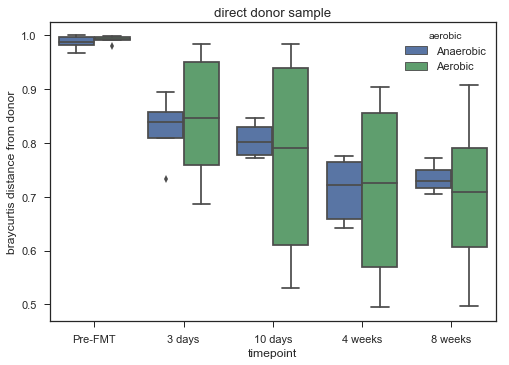

In [71]:
ax = sns.boxplot(x="timepoint", y="braycurtis", hue="aerobic", data=braycurtis_summary_df[braycurtis_summary_df["direct/pma"]=="direct"])
plt.xticks(plt.xticks()[0], ["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"])
ax.set_ylabel("braycurtis distance from donor")
ax.set_title("direct donor sample")
plt.show()

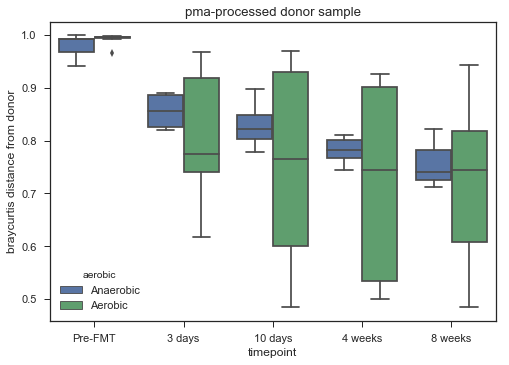

In [72]:
ax = sns.boxplot(x="timepoint", y="braycurtis", hue="aerobic", data=braycurtis_summary_df[braycurtis_summary_df["direct/pma"]=="pma"])
plt.xticks(plt.xticks()[0], ["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"])
ax.set_ylabel("braycurtis distance from donor")
ax.set_title("pma-processed donor sample")
plt.show()

In [61]:
jaccard_patient_summary_df = pd.DataFrame(columns=["donor", "patient","timepoint", "aerobic", "jaccard"])
donor_dict = {131:"Donor 1", 485:"Donor 2", 500:"Donor 3"}

with PdfPages("jaccard_patient_timeseries.pdf") as pp:
    for patient in patients:
        jaccard_patient_df = pd.DataFrame(columns=["timepoint", "jaccard"])
        prefmt_id = metadata.index[(metadata["person_id"] == patient) & (metadata["timepoint"] == "Pre-FMT")][0]
        for i, timepoint in enumerate(["3 days", "10 days", "4 weeks", "8 weeks"]):  
            try:
                sample_id = metadata.index[(metadata["person_id"] == patient) & (metadata["timepoint"] == timepoint)][0]                                           
                aerobic = metadata.loc[sample_id, "anaerobic_fmt"]
                jaccard = pairwise_distances(pd.concat([seq_var[sample_id], seq_var[prefmt_id]], axis=1).T,metric="jaccard")[0][1]
                donor = donor_dict[int(metadata.loc[sample_id, "donor_fmt_num"])]
                jaccard_patient_df = jaccard_patient_df.append({"timepoint":timepoint,  "jaccard":jaccard}, ignore_index=True)
                
                jaccard_patient_summary_df = jaccard_patient_summary_df.append({"donor":donor, "patient":patient,"timepoint":timepoint, "aerobic":aerobic,"jaccard":jaccard}, ignore_index=True)
                
            except Exception as e:
                print(e)

        ax = sns.barplot(x="timepoint", y="jaccard", data = jaccard_patient_df)
        ax.set_title("Patient: {} {}".format(int(patient),  aerobic))
        ax.set_ylabel("jaccard distance from pre-fmt")
        pp.savefig()
        plt.close()
        

/Users/vivzhong/anaconda/envs/intro_dl/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


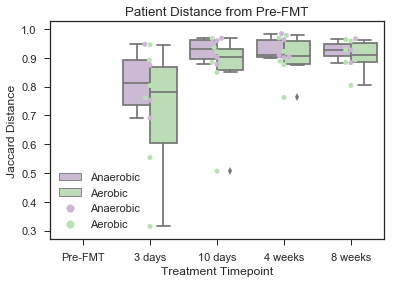

In [62]:
ax = sns.boxplot(x="timepoint", y="jaccard", hue="aerobic", hue_order=["Anaerobic", "Aerobic"], order=["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"],palette="PRGn",data=jaccard_patient_summary_df)
sns.swarmplot(x="timepoint", y="jaccard", hue="aerobic", hue_order=["Anaerobic", "Aerobic"],order=["Pre-FMT","3 days", "10 days", "4 weeks", "8 weeks"], palette="PRGn",data=jaccard_patient_summary_df)

ax.set_ylabel("Jaccard Distance")
ax.set_xlabel("Treatment Timepoint")
ax.set_title("Patient Distance from Pre-FMT")
leg = ax.axes.get_legend()
leg.set_title("")
plt.show()

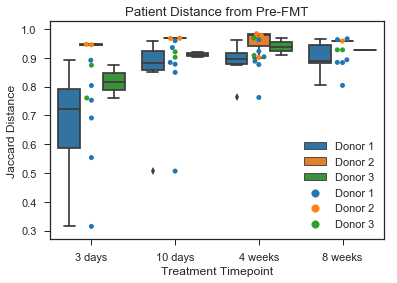

In [64]:
ax = sns.boxplot(x="timepoint", y="jaccard", hue="donor",  order=["3 days", "10 days", "4 weeks", "8 weeks"],data=jaccard_patient_summary_df)
sns.swarmplot(x="timepoint", y="jaccard", hue="donor",order=["3 days", "10 days", "4 weeks", "8 weeks"],data=jaccard_patient_summary_df)

ax.set_ylabel("Jaccard Distance")
ax.set_xlabel("Treatment Timepoint")
ax.set_title("Patient Distance from Pre-FMT")
leg = ax.axes.get_legend()
leg.set_title("")
plt.show()

In [34]:
braycurtis_patient_summary_df = pd.DataFrame(columns=["timepoint", "aerobic", "braycurtis"])
with PdfPages("braycurtis_patient_timeseries.pdf") as pp:
    for patient in patients:
        braycurtis_patient_df = pd.DataFrame(columns=["timepoint", "braycurtis"])
        prefmt_id = metadata.index[(metadata["person_id"] == patient) & (metadata["timepoint"] == "Pre-FMT")][0]
        for i, timepoint in enumerate(["3 days", "10 days", "4 weeks", "8 weeks"]):  
            try:
                sample_id = metadata.index[(metadata["person_id"] == patient) & (metadata["timepoint"] == timepoint)][0]                                           
                aerobic = metadata.loc[sample_id, "anaerobic_fmt"]
                braycurtis = pairwise_distances(pd.concat([seq_var_abundance[sample_id], seq_var_abundance[prefmt_id]], axis=1).T,metric="braycurtis")[0][1]
                
                braycurtis_patient_df = braycurtis_patient_df.append({"timepoint":timepoint,  "braycurtis":braycurtis}, ignore_index=True)
                
                braycurtis_patient_summary_df = braycurtis_patient_summary_df.append({"timepoint":timepoint, "aerobic":aerobic,"braycurtis":braycurtis}, ignore_index=True)
                
            except Exception as e:
                print(e)

        ax = sns.barplot(x="timepoint", y="braycurtis", data = braycurtis_patient_df)
        ax.set_title("Patient: {} {}".format(int(patient),  aerobic))
        ax.set_ylabel("braycurtis distance from pre-fmt")
        pp.savefig()
        plt.close()
        

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


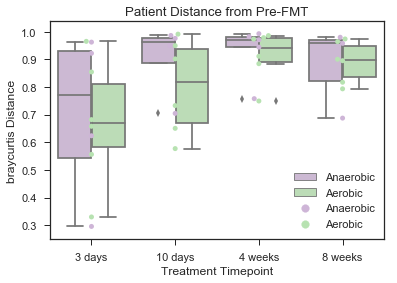

In [35]:
ax = sns.boxplot(x="timepoint", y="braycurtis", hue="aerobic", hue_order=["Anaerobic", "Aerobic"], order=["3 days", "10 days", "4 weeks", "8 weeks"],palette="PRGn",data=braycurtis_patient_summary_df)
sns.swarmplot(x="timepoint", y="braycurtis", hue="aerobic", hue_order=["Anaerobic", "Aerobic"],order=["3 days", "10 days", "4 weeks", "8 weeks"], palette="PRGn",data=braycurtis_patient_summary_df)

ax.set_ylabel("braycurtis Distance")
ax.set_xlabel("Treatment Timepoint")
ax.set_title("Patient Distance from Pre-FMT")
leg = ax.axes.get_legend()
leg.set_title("")
plt.show()